In [176]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [177]:
from astropy.io import fits

In [178]:
ROOT = "/home/denis/.birales/visualisation/fits/Observation_2018-03-26T1444/"
hdu_list = fits.open(ROOT+"Observation_2018-03-26T1444_raw.fits")

In [179]:
hdu_list.info()

Filename: /home/denis/.birales/visualisation/fits/Observation_2018-03-26T1444/Observation_2018-03-26T1444_raw.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   (2432, 8192, 1)   float64   


In [180]:
image_data = hdu_list[0].data

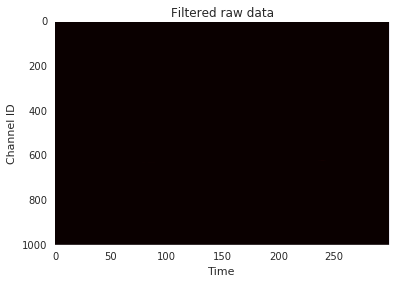

In [181]:
fig, (ax_filtered) = plt.subplots(1,1)
im_filtered = ax_filtered.imshow(image_data[0][5000:6000, 1200:1500],aspect='auto', interpolation='none', cmap=plt.cm.hot)
ax_filtered.set(xlabel='Time', ylabel='Channel ID', title='Filtered raw data')
ax_filtered.grid(False)

In [182]:
NBINS = 1000
data = hdu_list[0].data

# Process only one beam
image_data = data[0, :, :]


In [183]:
summed = np.sum(image_data, axis=1)
print(summed.max())
mean_summed = np.mean(summed)
print(mean_summed)
print(image_data.mean())
print(np.mean(image_data[5618,]))

trans_channels = np.where(summed > mean_summed*np.std())
print(trans_channels)

331306186.564
48267.0362703
19.8466432033
24.8459692405
(array([5618, 5619, 5620, 5621]),)


6.42143106461
(8192, 2432)
Noise estimate: 5.36
Threshold1: 11.97
Elements below threshold: 100.00%


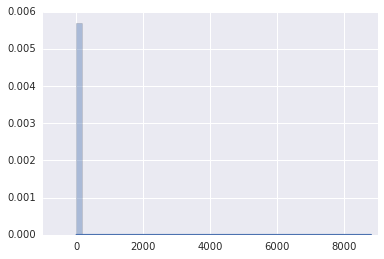

In [184]:


print(image_data[5618, 1000])
print(image_data.shape)
image_data[5619,:] = 0
image_data[5620,:] = 0

# image_data = image_data[image_data > 0.]
# image_data = image_data[image_data < 50]
NOISE = np.sqrt(np.mean(image_data**2))
THRES1 = 2.*np.std(image_data) + np.mean(image_data)

print('Noise estimate: {:0.2f}'.format(NOISE))
print('Threshold1: {:0.2f}'.format(THRES1))
print('Elements below threshold: {:0.2f}%'.format(image_data[image_data < THRES].shape[0] *100. / image_data.size))

#plt.axvline(THRES, color='r', linestyle='dashed', linewidth=2)
# histogram = plt.hist(image_data.flatten(), NBINS, normed=True)

sns.distplot(image_data.flatten());

In [185]:
# filtered_image_data = fits.getdata(ROOT+"Observation_2018-03-26T1444_filtered.fits")
# NBINS = 1000
# plt.ylim(0, 10000)
# filtered_hist = plt.hist(filtered_image_data[0].flatten(), NBINS)